In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

In [2]:
cd ~/Desktop

C:\Users\agilman\Desktop


In [3]:
data = pd.read_csv("bioreactor_data_test.txt", delimiter = "\t")

In [ ]:
data = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')

list_BSR3 = ["R0007","R0008","R0009","R0010"]
list_BSR4 = ["R0013","R0014"]  #["R0011","R0012","R0013","R0014"]
data = data[data["Sample ID"].isin(list_BSR4)]

dict_label = {"R0007":"Perfusion",
              "R0008":"Perfusion",
              "R0009":"Fed-Batch",
              "R0010":"Fed-Batch",
              "R0011":"Perfusion",
              "R0012":"Fed-Batch",
              "R0013":"Fed-Batch",
              "R0014":"Fed-Batch"}
xmin = -0.5
xmax = 15

dict_ymin = {'VCD':0, 'Viability':40, 'Titer':0, 'O2 Saturation':0, 'PCO2':0, 
            'Gluc':0, 'Lac':0,'pH':6.2,'NH4+':0,'Gln':0, 'Glu':0,'Na+':0, 'K+':0, 'Ca++':0}


list1_3itms = ['VCD', 'Viability', 'Titer']
list2_4itms = ['O2 Saturation', 'PCO2', 'Gluc', 'Lac',]
list3_4itms = ['pH','NH4+','Gln', 'Glu',]
list4_3itms = ['Na+', 'K+', 'Ca++']

dict1_3itms = {'VCD':"10E6 Cells/mL", 'Viability':"% Viable", 'Titer':"g/L"}
dict2_4itms = {'O2 Saturation':"% Air Saturation", 'PCO2':"mmHg", 'Gluc':"g/L", 'Lac':"g/L",}
dict3_4itms = {'pH':"pH",'NH4+':"mmol/L",'Gln':"mmol/L", 'Glu':"mmol/L",}
dict4_3itms = {'Na+':"mmol/L", 'K+':"mmol/L", 'Ca++':"mmol/L"}

# Latest version of 3x1 plot - need to functionilize 

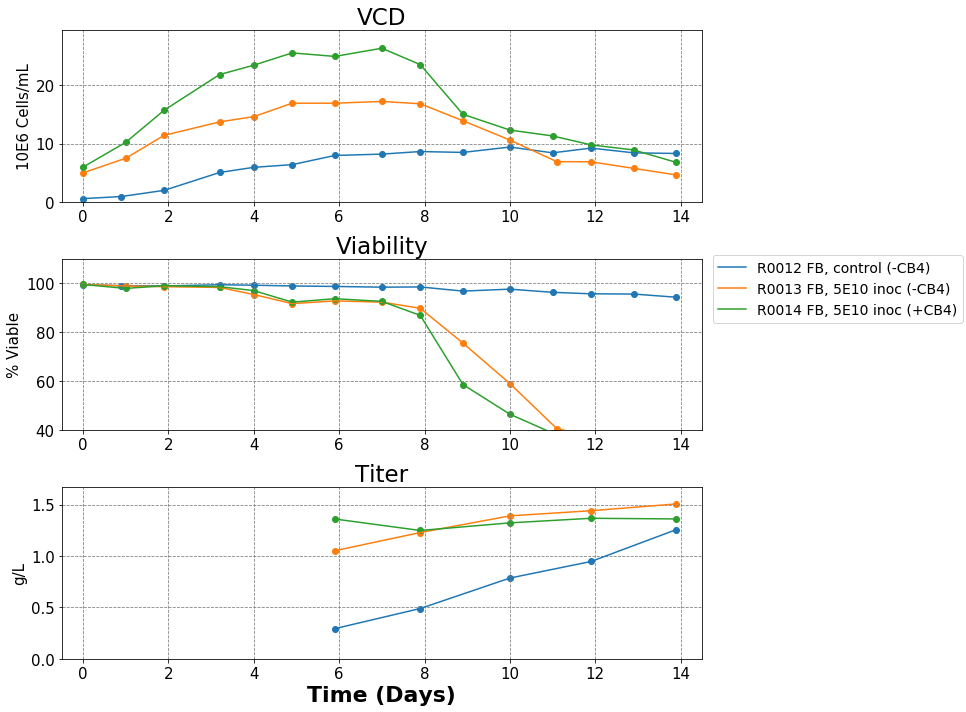

In [4]:
data = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')

list_BSR3 = ["R0007","R0008","R0009","R0010"]
list_BSR4 = ["R0012","R0013","R0014"]
data = data[data["Sample ID"].isin(list_BSR4)]

dict_label = {"R0007":"Perfusion",
              "R0008":"Perfusion",
              "R0009":"Fed-Batch",
              "R0010":"Fed-Batch",
              "R0011":"Perfusion, 0.2um",
              "R0012":"FB, control (-CB4)",
              "R0013": "FB, 5E10 inoc (-CB4)",
              "R0014": "FB, 5E10 inoc (+CB4)"}

xmin = -0.5
xmax = 14.5

dict_ymin = {'VCD':0, 'Viability':40, 'Titer':0, 'O2 Saturation':0, 'PCO2':0, 
            'Gluc':0, 'Lac':0,'pH':6.4,'NH4+':0,'Gln':0, 'Glu':0,'Na+':0, 'K+':0, 'Ca++':0}


list1_3itms = ['VCD', 'Viability', 'Titer']
list2_4itms = ['O2 Saturation', 'PCO2', 'Gluc', 'Lac',]
list3_4itms = ['pH','NH4+','Gln', 'Glu',]
list4_3itms = ['Na+', 'K+', 'Ca++']

list5_3itms = ['O2 Saturation', 'Gluc', 'Lac',]

dict1_3itms = {'VCD':"10E6 Cells/mL", 'Viability':"% Viable", 'Titer':"g/L"}
dict2_4itms = {'O2 Saturation':"% Air Saturation", 'PCO2':"mmHg", 'Gluc':"g/L", 'Lac':"g/L",}
dict3_4itms = {'pH':"pH",'NH4+':"mmol/L",'Gln':"mmol/L", 'Glu':"mmol/L",}
dict4_3itms = {'Na+':"mmol/L", 'K+':"mmol/L", 'Ca++':"mmol/L"}

dict5_3itms = {'O2 Saturation':"% Air Saturation", 'Gluc':"g/L", 'Lac':"g/L",}


the_list = list3_4itms
the_dict = dict3_4itms

#################################################################################


fig = plt.figure(figsize = (14,10))
num=1
for i, value in dict1_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + dict_label[key])) #line plots
        
        
    ax.set_xlim(left = xmin, right = xmax) #forcing a zero lower x limit (titer)
    ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size 
    ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
        
    ax.set_title(i, fontsize = 23)
    
    ymin, ymax = ax.get_ylim() #get the min and max of respective axes
    ax.set_ylim(bottom = dict_ymin[i], top = ymax*1.05 ) #bottom defined by dict per each param, top = max*1.05

    #adding x-axis on the last subplot
    if num == 4:
        ax.set_xlabel("Time (Days)", fontsize = 22, fontweight = "bold") #x-axis label
    else:
        pass
    
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,  bbox_to_anchor = (0.7,.644), loc = "upper left", fontsize = 14 )
fig.tight_layout()
fig.subplots_adjust(right=0.7) 


plt.savefig("Figure1_vitals.png", dpi = 500)


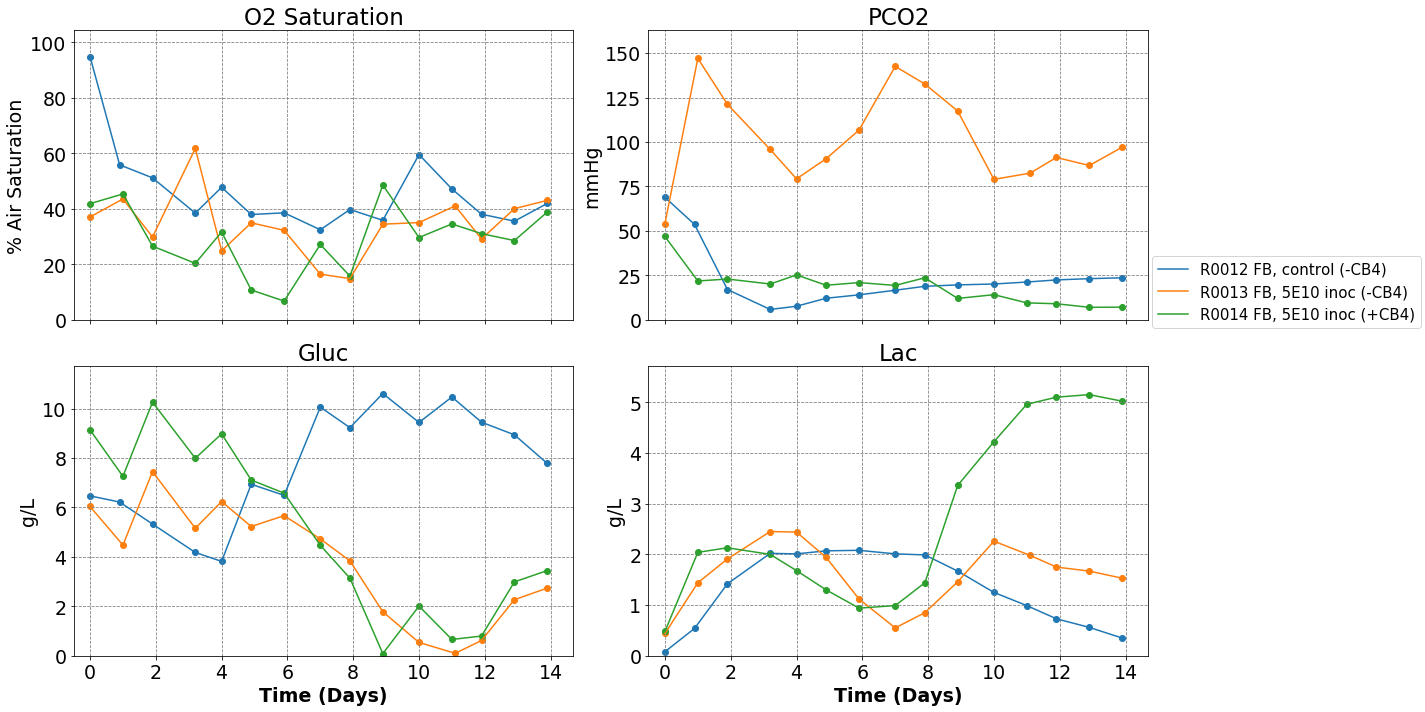

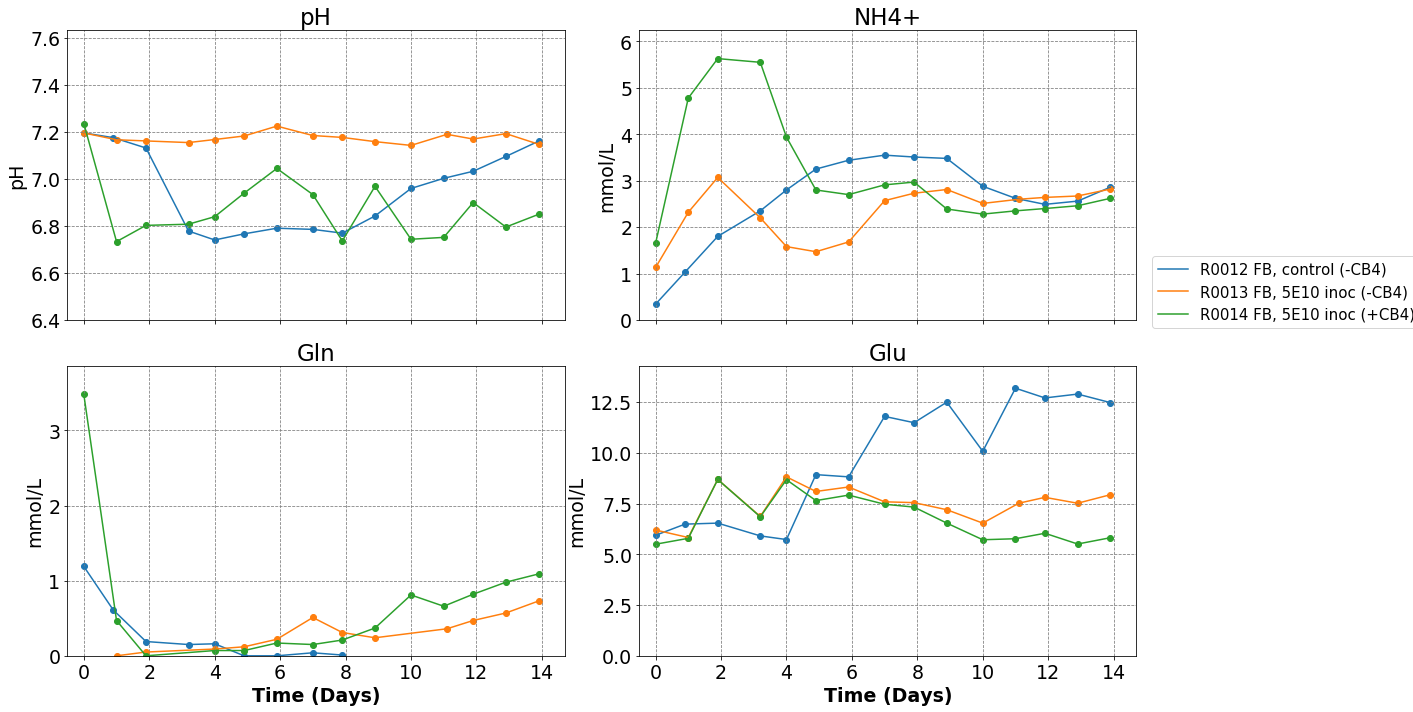

In [5]:
data = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')

list_BSR3 = ["R0007","R0008","R0009","R0010"]
list_BSR4 = ["R0012","R0013","R0014"]
data = data[data["Sample ID"].isin(list_BSR4)]

dict_label = {"R0007":"Perfusion",
              "R0008":"Perfusion",
              "R0009":"Fed-Batch",
              "R0010":"Fed-Batch",
              "R0011":"Perfusion, 0.2um",
              "R0012":"FB, control (-CB4)",
              "R0013": "FB, 5E10 inoc (-CB4)",
              "R0014": "FB, 5E10 inoc (+CB4)"}

xmin = -0.5
xmax = 15

dict_ymin = {'VCD':0, 'Viability':40, 'Titer':0, 'O2 Saturation':0, 'PCO2':0, 
            'Gluc':0, 'Lac':0,'pH':6.4,'NH4+':0,'Gln':0, 'Glu':0,'Na+':0, 'K+':0, 'Ca++':0}


list1_3itms = ['VCD', 'Viability', 'Titer']
list2_4itms = ['O2 Saturation', 'PCO2', 'Gluc', 'Lac',]
list3_4itms = ['pH','NH4+','Gln', 'Glu',]
list4_3itms = ['Na+', 'K+', 'Ca++']

list5_3itms = ['O2 Saturation', 'Gluc', 'Lac',]

dict1_3itms = {'VCD':"10E6 Cells/mL", 'Viability':"%", 'Titer':"g/L"}
dict2_4itms = {'O2 Saturation':"% Air Saturation", 'PCO2':"mmHg", 'Gluc':"g/L", 'Lac':"g/L",}
dict3_4itms = {'pH':"pH",'NH4+':"mmol/L",'Gln':"mmol/L", 'Glu':"mmol/L",}
dict4_3itms = {'Na+':"mmol/L", 'K+':"mmol/L", 'Ca++':"mmol/L"}

dict5_3itms = {'O2 Saturation':"% Air Saturation", 'Gluc':"g/L", 'Lac':"g/L",}


the_list = list3_4itms
the_dict = dict3_4itms

#################################################################################


#################################################################################


fig, axes = plt.subplots(nrows=2, ncols =2 , sharex=True, figsize = (20,10))

#axes[0].plot([1,2,3,4],[10,20,30,40])

#for i, value in dict2_4itms.items():
#print (fig.axes()[0])

for i, ax in enumerate(fig.axes):
    
        for key, grp in data.groupby(['Sample ID']): 
            clm = list2_4itms[i]   #column name from list, called by enumerated for loop
            
            ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_') #Point plots
            mask = np.isfinite(grp[clm]) #masking over NaN data (lines dont connect)
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key + " " + dict_label[key])) #line plots
            
            
            
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=19) #tick labels size
    
        ax.set_ylabel(dict2_4itms[clm] , fontsize = 19) #y-axis label

        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

        ax.set_title(clm, fontsize = 23)
        ymin, ymax = ax.get_ylim() #get the min and max of respective axes
        ax.set_ylim(bottom = dict_ymin[clm], top = ymax*1.05 ) #bottom defined by dict per each param, top = max*1.05

            
axes[1,0].set_xlabel("Time (Days)", fontsize = 19, fontweight = "bold") #x-axis label manually adding to outer 
axes[1,1].set_xlabel("Time (Days)", fontsize = 19, fontweight = "bold") #x-axis label

            
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,  bbox_to_anchor = (0.795,.644), loc = "upper left", fontsize = 15 )
fig.tight_layout()
fig.subplots_adjust(right=0.8, wspace=0.15) 
        

plt.savefig("Figure2_gases.png", dpi = 500)

 ################################################################################################
    


fig, axes = plt.subplots(nrows=2, ncols =2 , sharex=True, figsize = (20,10))

#axes[0].plot([1,2,3,4],[10,20,30,40])

#for i, value in dict2_4itms.items():
#print (fig.axes()[0])

for i, ax in enumerate(fig.axes):
    
        for key, grp in data.groupby(['Sample ID']): 
            clm = list3_4itms[i]   #column name from list, called by enumerated for loop
            
            ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_') #Point plots
            mask = np.isfinite(grp[clm]) #masking over NaN data (lines dont connect)
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key + " " + dict_label[key])) #line plots
            
            
            
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=19) #tick labels size
        ax.set_ylabel(dict3_4itms[clm] , fontsize = 19) #y-axis label

        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

        ax.set_title(clm, fontsize = 23)
        
        ymin, ymax = ax.get_ylim() #get the min and max of respective axes
        ax.set_ylim(bottom = dict_ymin[clm], top = ymax*1.05 ) #bottom defined by dict per each param, top = max*1.05
        
        
            
axes[1,0].set_xlabel("Time (Days)", fontsize = 19, fontweight = "bold") #x-axis label manually adding to outer 
axes[1,1].set_xlabel("Time (Days)", fontsize = 19, fontweight = "bold") #x-axis label

            
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,  bbox_to_anchor = (0.795,.644), loc = "upper left", fontsize = 15 )
fig.tight_layout()   
fig.subplots_adjust(right=0.8, wspace = 0.15) 
   

plt.savefig("Figure3_chemistry.png", dpi = 500)



### Metals plot (same as vitals)

In [ ]:

fig = plt.figure(figsize = (14,10))
num=1
for i, value in dict4_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + dict_label[key])) #line plots
        
        
    ax.set_xlim(left = xmin, right = xmax) #forcing a zero lower x limit (titer)
    ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size 
    ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
        
    ax.set_title(i, fontsize = 23)
    
    ymin, ymax = ax.get_ylim() #get the min and max of respective axes
    ax.set_ylim(bottom = dict_ymin[i], top = ymax*1.05 ) #bottom defined by dict per each param, top = max*1.05

    #adding x-axis on the last subplot
    if num == 4:
        ax.set_xlabel("Time (Days)", fontsize = 22, fontweight = "bold") #x-axis label
    else:
        pass
    
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,  bbox_to_anchor = (0.7,.644), loc = "upper left", fontsize = 14 )
fig.tight_layout()
fig.subplots_adjust(right=0.7) 


plt.savefig("Figure4_metals.png", dpi = 500)


In [ ]:
fig = plt.figure(figsize = (10,10))
num=1
for i, value in dict4_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + dict_label[key])) #line plots
        
        
    ax.set_xlim(left = -0.5, right = xmax) #forcing a zero lower x limit (titer)
    ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
    ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
    ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.label_outer()
        
    ax.set_title(i, fontsize = 23)
    
    ymin, ymax = ax.get_ylim() #get the min and max of respective axes
    ax.set_ylim(bottom = dict_ymin[i], top = ymax*1.05 ) #bottom defined by dict per each param, top = max*1.05

        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.76) 

plt.savefig("Figure4_metals.png", dpi = 500)


# Making an individual plot

In [ ]:
data = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')

list_BSR3 = ["R0007","R0008","R0009","R0010"]
list_BSR4 = ["R0011"] #["R0011","R0012","R0013","R0014"]
data = data[data["Sample ID"].isin(list_BSR4)]

dict_label = {"R0007":"Perfusion",
              "R0008":"Perfusion",
              "R0009":"Fed-Batch",
              "R0010":"Fed-Batch",
              "R0011":"Perfusion",
              "R0012":"0.5E6, -CB4",
              "R0013":"5.0E6, -CB4",
              "R0014":"5.0E6, +CB4"}

xmin = -0.5
xmax = 15

dict_ymin = {'VCD':0, 'Viability':40, 'Titer':0, 'O2 Saturation':0, 'PCO2':0, 
            'Gluc':0, 'Lac':0,'pH':6.4,'NH4+':0,'Gln':0, 'Glu':0,'Na+':0, 'K+':0, 'Ca++':0}


list1_3itms = ['VCD', 'Viability', 'Titer']
list2_4itms = ['O2 Saturation', 'PCO2', 'Gluc', 'Lac',]
list3_4itms = ['pH','NH4+','Gln', 'Glu',]
list4_3itms = ['Na+', 'K+', 'Ca++']

list5_3itms = ['O2 Saturation', 'Gluc', 'Lac',]

dict1_3itms = {'VCD':"10E6 Cells/mL", 'Viability':"%", 'Titer':"g/L"}
dict2_4itms = {'O2 Saturation':"% Air Saturation", 'PCO2':"mmHg", 'Gluc':"g/L", 'Lac':"g/L",}
dict3_4itms = {'pH':"pH",'NH4+':"mmol/L",'Gln':"mmol/L", 'Glu':"mmol/L",}
dict4_3itms = {'Na+':"mmol/L", 'K+':"mmol/L", 'Ca++':"mmol/L"}

dict5_3itms = {'O2 Saturation':"% Air Saturation", 'Gluc':"g/L", 'Lac':"g/L",}


In [ ]:
i = "VCD"
value = "10E6 Cells/mL"

fig, ax = plt.subplots(figsize=(5,3))
for key, grp in data.groupby(['Sample ID']):
    ax.scatter(grp['Runtime'], grp[i], label='_nolegend_')
    mask = np.isfinite(grp[i])
    ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + dict_label[key])) #line plots
    

ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
ax.set_xlabel("Time (Days)", fontsize = 12) #x-axis label
ax.set_ylabel(value , fontsize = 8) #y-axis label
        
        
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.label_outer()
        
ax.set_title(i, fontsize = 20)
ax.set_ylim(bottom = dict_ymin[i])
    
    
ax.legend()
fig.tight_layout()
plt.savefig("Figure_R11VCD.png", dpi = 500)

"""

    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + dict_label[key])) #line plots
        
"""

In [ ]:
data = data.iloc[:6,:]